### [선형회귀] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요

In [1]:
import seaborn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#To get 'nxm' if we call for numpy.rand function.
X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


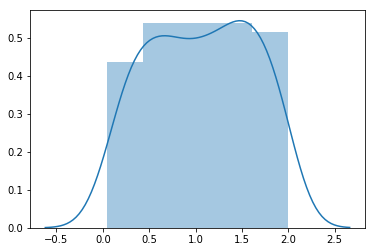

In [25]:
#우리의 X,y 데이터셋
seaborn.distplot(X)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


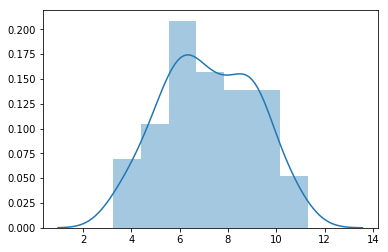

In [4]:
seaborn.distplot(y)

---
#### 문제에 구성된 X,y Vector는 ??
변화되는 시점을 X축, 그리고 각 시점마다 얻어지는 특징을 y라고 가정했으며,
X는 0-2 사이에 랜덤한 값을 가지고 있고,
y는 X의 특정 시점에 대해 항상 3X의 행렬 값에 4를 더하고, 이를 가우시안 분포로 얻어진 행렬에 덧셈 연산한 값을 가진다.
따라서 동일한 크기를 가지는 X,y의 Vector를 가지고 다음 문제를 진행하기로 한다.

화면 출력 결과


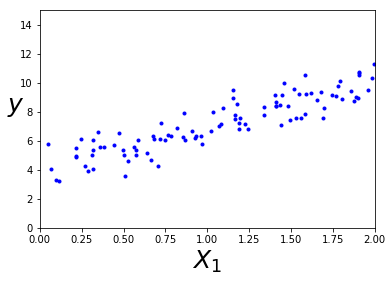

Figure.1


In [5]:
plt.plot(X,y,"b.")
print("화면 출력 결과")
plt.xlabel("$X_1$",fontsize=25)
plt.ylabel("$y$", rotation=0, fontsize=25)
plt.axis([0,2,0,15]) #[xmin, xmax, ymin, ymax]
plt.show()
print("Figure.1")

(1) 앞서 얻은 X,y vector를 X의 대한 y의 값으로 그래프를 표현하면 Figure.1 과 같은 선형 분포를 가지는 그래프를 얻을 수 있다.

### 정규방정식 사용한 선형회귀 접근 ###

In [6]:
test1 = 3+np.random.rand(4,2)
test2 = 1+np.random.rand(4,2)

print(test1, test2)
test1.T.dot(test2)

[[3.33942837 3.7125315 ]
 [3.12364954 3.84407115]
 [3.95605844 3.92858892]
 [3.70084516 3.173712  ]] [[1.95274165 1.28638096]
 [1.89401078 1.32586718]
 [1.48372346 1.58666376]
 [1.43996505 1.2388902 ]]


array([[23.6360512 , 19.29919686],
       [24.92930099, 20.03768798]])

In [7]:
X_b = np.c_[np.ones((100,1)), X] # concatenation

"""
numpy linear algebra

numpy.linear_algebra.inverse = inverse metrix
numpy.T = Transpose
numpy.dot = dot product
"""
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.95355605]
 [3.05926503]]


-----
(2) X_b 는 100개의 행과 2개의 열로 구성되어 있다.
예를들어, 
```
(1,2)
(3,4)
(5,6)
.....
(n,m)
```
과 같이 구성되어 있다.

X_b의 구성요소는 1첫번째 열에 1로만 채워진 값과 두번째 열에 X의 대한 열벡터가 정의되어 진다.
다음으로 X_b를 전치한 후에 내적으로 본래의 X_b를 연산한다. 
첫번째 전치에서 2 x 2행렬의 값을 구할 수 있으며, 대칭행렬과 유사한 형태의 값을 얻을 수 있다. 
그 이유는 첫번째 전치 행렬의 내적은 각 행렬마다 1로 이루어진 행 또는 열 벡터를 가지고 있기 때문이다.<br>
[sigma(1), sigma(X)<br>
 sigma(X), sigma(X^2)]
 
 그리고 값 역행렬을 취한 후 X_b의 전치행렬과 다시 내적연산 후에 y로 내적연산 한다.
 그러면 최종적으로 2x1의 행렬을 구할 수 있으며, 이것은 100개의 특징을 가지는 벡터는 연산하기가 어려운 표현방법이며,
 이를 2개로 종합하여 대량의 데이터 셋을 간소화한 형태다.

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.95355605]
 [10.07208612]]


(3) 이때 y_predict는 선형 분리의 대한 조건으로, figure.2처럼 공간에 선을 긋고 데이터를 분류한다.
예를 들면, prediction은 대략 X축의 대한 임펄스 값 조건이 4에서 10으로 진행하고, 공간을 두개로 분류한다.

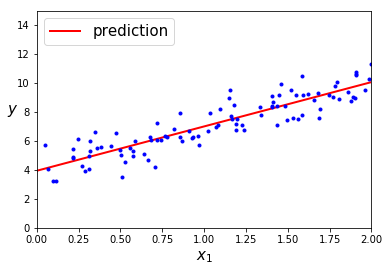

figure.2


In [9]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.axis([0,2,0,15])
plt.show()
print("figure.2")

(4) prediction의 결과는 figure.2와 같다.

In [10]:
#for linear regression(선형 회귀)
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print("intercept : ",lin_reg.intercept_, "\n coefficient : ",lin_reg.coef_)

lin_reg_result = lin_reg.predict(X_new)

intercept :  [3.95355605] 
 coefficient :  [[3.05926503]]


(5)<br>
intercept는 X가 0일 때, 얻을 수 있는 값을 뜻하며, 바이어스된 값으로도 볼 수 있다.<br>
coefficient는 기울기 또는 가장 간단한 단일 가중치로 해석할 수 있을 것이다.<br>
결과적으로 intercept = about(4) , coef = about(3) 이라면 다음과 같은 수식을 만족한다. <br>
y = 4 + 3X <br>
그리고 X가 0.25가 입력되었다면, 4.75라는 값을 추정할 수 있으며, figure.2를 볼 때도 유사한 값을 얻을 수 있음을 알 수 있다.

In [13]:
#prediction
print(lin_reg_result)
print(lin_reg.predict(0.25))

[[ 3.95355605]
 [10.07208612]]
[[4.71837231]]


(6) 실제로 0.25를 넣었을 때, 4.75에 가장 유사한 데이터 4.8이라는 데이터를 추정할 수 있었다.

In [14]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("SVD : \n",theta_best_svd)
print("\nPseudo-inverse : \n", np.linalg.pinv(X_b).dot(y))

SVD : 
 [[3.95355605]
 [3.05926503]]

Pseudo-inverse : 
 [[3.95355605]
 [3.05926503]]


(7) SVD는 특이값 분해라고 하며, 정방행렬이 아닌 행렬에서 행렬의 intercept와 coefficient를 찾을 수 있다.<br>
특이값이란 것은 행렬을 선형변환하는 과정에서 발생하는 스케일(Scale)의 변화량을 뜻 한다.<br>

(8) 다음은 의사역행렬이다.<br>
기본적인 단일 x,y의 대한 행렬 방정식은 쉽게 구할 수 있다.
하지만, 앞서 예제는 다양한 입력(대량의 데이터셋)에서 서로 다른 출력의 결과를 가지는 행렬로 구성되어 있다.
이럴 경우 일반적인 방정식에서 해를 구할 수는 없기 때문에 의사역행렬을 사용하여 직선의 대한 방정식을 구해야한다.
이를 Line fitting 이라고 한다.
즉 이렇게 구해진 의사역행렬에서 y의 대한 내적연산을 통해 직선의 방정식을 구할 수 있다. 결국 이 과정은 위에서 진행되었던 직선 방정식을 구하는 예제와 같다.
<br>
즉 이번 문제에서는 numpy를 이용하여 행렬의 대한 선형 분리 조건인 직선의 방정식을 구할 수 있는 lstsq 와 pinv를 사용해보는 예제다.

### 경사 하강법을 사용한 선형회귀 접근

In [15]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iter in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
print("Descent Gradient result : \n",theta)
print("\nlinear algebra : \n", X_new_b.dot(theta))

Descent Gradient result : 
 [[3.95355605]
 [3.05926503]]

linear algebra : 
 [[ 3.95355605]
 [10.07208612]]


(9) 위 코드는 경사하강법을 이용하여 최적의 직선의 방정식을 구하는 예다.
iteration의 기간동안 수렴율(에러율)과 지속적으로 변화되는 기울기를 이용하여 최적의 theta값을 찾아내는 것 이다.
그 결과 1000번의 iteration과 0.1의 에러율을 통하여 변화되는 기울기로부터 기울기가 더 이상 변하지 않는 최적의 지점을 찾아내고,
앞서 예제들과 유사한 값들을 찾을 수 있음을 보여준다. 

(10) 따라서 최적의 기울기 theta를 이용하여 직선의 방정식을 추측한 결과 앞선 예제와 유사함을 알 수 있다. <br>이것이 경사하강법을 이용한 직선의 방정식을 구한 것 이다.


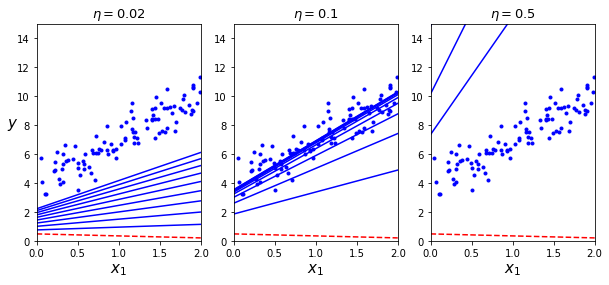

figure.3


In [17]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iter in range(n_iterations):
        if iter < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iter > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
        
        plt.xlabel("$x_1$", fontsize=15)
        plt.axis([0,2,0,15])
        plt.title(r"$\eta = {}$".format(eta), fontsize=13)

plt.figure(figsize=(10,4))
np.random.seed(42)
theta = np.random.randn(2,1)

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=15)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.show()
print("figure.3")

(11) Figure.3은 3개의 학습률 가지고 가장 최적의 직선의 방정식을 찾기 위해 Tranining하는 것을 볼 수 있다.
각 작업은 동일한 데이터 셋으로 1000번을 수행하여 최적의 직선 방정식을 구하는 것이다.<br>

학습률이 0.02였을 때, 머신은 데이터 셋을 분류하기 위한 영역으로 수렴하지 못 했다. 이것은 에러율이 너무 적어서 1000번이라는 반복 동안 분류을 위한 방정식을 찾는 것 조차 불가능했음을 보여주고, 이를 수렴이 느리다고 이야기한다. <br><br>
학습률이 0.1 일 때, 머신은 이전보다 빠르게 분류 영역에 수렴하였음을 볼 수 있고, 데이터 분류를 위한 최적의 직선방정식을 더 잘 찾을 수 있다.<br><br>
학습률이 0.5 일 때, 머신은 분류 영역을 초과하여 발산해버리고 있음을 보여준다. 이것은 너무 높은 학숩률에 의해 직선의 방정식을 연산하지 못 하고 발산해버리고마는 결과다.

따라서 이번 예제에서는 **최적의 학습률은 0.1**이 됨을 알 수 있다.

### Stochastic 경사 하강법을 사용한 선형회귀 접근

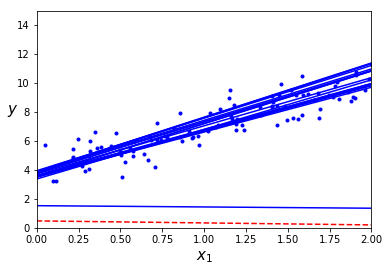

display theta : 
 [[3.96077876]
 [3.04450533]]
figure.4


In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50

theta = np.random.randn(2,1)

def learning_schedule(t):
    return t0/ (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)# 무작위 선택 
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.axis([0,2,0,15])

plt.show()
print("display theta : \n", theta)
print("figure.4")

(12) 확률적 경사하강법이란, 현재 주어진 데이터 셋에서 하나의 배치크기 만큼 무작위 선정하여 학습하는 것을 말한다.
현재 보이는 figure.4에서 기울기가 빠르게 수렴하는 것을 볼 수 있고, 실제 기존 경사기법에서 1000번 수행하던 것과 달리 이곳에서는 epoch라는 개념으로 바뀌면서
50번의 반복을 통해 최적의 직선방정식을 구할 수 있음을 확인할 수 있다. <br><br>
하지만, 이런 확률적 방법론은 전체 데이터 셋 중 일부만 취하여 학습하면서 방정식을 찾는 것인데, 데이터셋이 거의 유사한 특징들을 가지고 있다면 문제는 없지만,
분포도가 매우 넓어 유사성을 찾기가 힘든 경우 확률적인 방법으로 방정식을 찾는 것은 기존의 경사하강법보다 적중률이 낮아질 수 있다.
<br><br>
현재 예제에서는 분포도가 매우 조밀하기 때문에 큰 문제없이 최적의 방정식을 찾을 수 있다.

(13) theta의 출력결과 2.9에서 3.9로 공간을 분리하는 선을 만들어 냈음을 알 수 있다.

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)

In [20]:
print(sgd_reg.fit(X, y.ravel()))
print("intercept : \n",sgd_reg.intercept_,"\ncoefficient : \n", sgd_reg.coef_)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)
intercept : 
 [4.02236434] 
coefficient : 
 [3.1341401]


(14) 이번 예제는 **머신러닝 라이브러리 중 대표적인 라이브러리인 sklearn 라이브러리를 활용하여 linear algebra의 해를 찾기 위한 Regression 모듈을 사용**한 것이다.
지금까지 직접 코딩을 통해 알고리즘을 모델링했지만, 이미 대부분의 모델은 구현되어 배포되고 있으며, 보다 최적의 모델링을 하기 전 간단한 테스트 등을 위해서 SGDRegressor와 같은 메소드를 활용하여 손쉽게 학습을 수행해 볼 수 있다.<br><br>

(15) 머신러닝을 도와주는 도구를 사용하여 최적의 직선을 연산한 결과 theta의 값이 이전 예제들과 유사함을 알 수 있다.


### Mini-batchs에서 경사 하강 선형회귀

[[3.25990429]
 [3.07654102]]


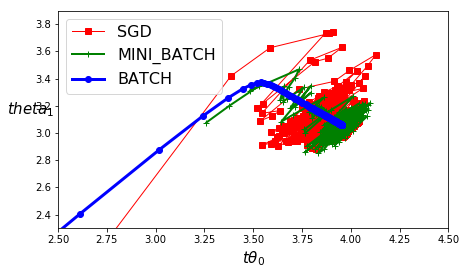

figure.5


In [21]:
theta_path_mgd = []
n_terations = 50
mini_batch_size = 20
np.random.seed(42)

theta = np.random.randn(2,1)
t0, t1 = 200, 1000

t = 0
def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, mini_batch_size):
        t += 1
        xi = X_b_shuffled[i : i+mini_batch_size]
        yi = y_shuffled[i : i+mini_batch_size]
        
        gradients = 2/mini_batch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(theta_path_mgd[0])
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='SGD')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH" )
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$t\theta_0$", fontsize=15)
plt.ylabel(r"$theta_1$", fontsize=15, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print("figure.5")

(16) 미니 배치 확률적 경사 하강법은 기존 확률적 경사 하강법보다 조금 더 개선을 위한 모델이다.
조금 더 자세히 풀어보자면, 일반적으로 우리가 알고 있던 경사 하강법은 정확하게 3가지로 분류가 가능하다.
<br><br>
1. 전체 배치로부터 기울기의 수렴을 구하는 **경사 하강법**
2. 전체 배치 중 무작위로 1개의 배치를 골라 학습하는 **확률적 경사 하강법**
3. 전체 배치 중 일부 배치를 무작위 집단으로 골라 학습하는 **미니배치 확률적 경사 하강법**
<br>
미니배치 확률적 경사 하강법은 epochs동안 한 번 loop가 수행될 때 마다, 전체 데이터 셋 중 무작위 집단을 선정하여 학습하는 것이다.
이것은 초기 경사 하강법보다 학습시간이 훨씬 줄어드는 것은 당연하고, 일반적인 확률적 경사 하강법보다 더욱 정확하게 predict line을 그릴 수 있다.
<br>

(17) figure 5를 보면 기존 경사하강법과 확률적 경사 하강법은 서로 다른 방법으로 수렴하는 것을 알 수 있다.<br>
기존 경사 하강법은 전체 배치를 통해 학습하므로 완만한 곡선을 그리는 것을 알 수 있으나, 확률적 경사 하강법은 마치 사람의 심전도 검사를 하는 것과 같은 형태로 점점 수렴하고 잇는 것을 알 수 있다.